<a href="https://colab.research.google.com/github/sarthaksolow/VPeakFit/blob/main/meal_review_and_tips_gemini_langchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

! pip install -q --upgrade google-generativeai langchain-google-genai chromadb pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.3/584.3 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.9/393.9 kB 20.6 MB/s eta 0

In [2]:
from IPython.display import display
from IPython.display import Markdown
import textwrap


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [3]:
import google.generativeai as genai
from google.colab import userdata
import os

In [4]:
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

**using langchain**

In [5]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [6]:
llm=ChatGoogleGenerativeAI(model="gemini-pro",google_api_key=GOOGLE_API_KEY)

In [7]:
result=llm.invoke("whats the best place to go for a date around dwarka delhi  ")

In [8]:
to_markdown(result.content)

> **Romantic Restaurants:**
> 
> * **The Westin Gurgaon, New Delhi:** Offers a luxurious dining experience with stunning views of the city skyline.
> * **Olive Bar & Kitchen:** A Mediterranean-inspired restaurant known for its elegant ambiance and delicious food.
> * **Sevilla, The Claridges:** Transport yourself to Spain with this vibrant restaurant serving authentic tapas and paella.
> * **The Roseate:** An upscale restaurant with a romantic setting and a menu that features modern Indian cuisine.
> * **Amour Bistro:** A cozy and intimate bistro serving European and Mediterranean dishes.
> 
> **Scenic Spots:**
> 
> * **Garden of Five Senses:** A beautiful botanical garden with lush greenery, water features, and sculptures.
> * **Sultanpur National Park:** A tranquil park with a lake, bird sanctuary, and walking trails.
> * **Delhi Golf Course:** A picturesque golf course with sprawling lawns and a stunning view of the city.
> * **Dwarka Sector 12 Park:** A large park with a lake, walking paths, and a playground.
> * **Dwarka Sector 10 Park:** A peaceful park with a rose garden, fountains, and a children's play area.
> 
> **Cultural Experiences:**
> 
> * **National Museum:** Explore India's rich history and culture through artifacts, sculptures, and paintings.
> * **Thyagaraja Stadium:** Catch a live performance of classical music or dance.
> * **India Gate:** Visit this iconic monument at night for a romantic stroll.
> * **Qutab Minar:** Admire the architectural beauty of this UNESCO World Heritage site.
> * **Lotus Temple:** Visit this stunning temple shaped like a lotus flower.
> 
> **Activities:**
> 
> * **Go for a boat ride:** Enjoy a romantic boat ride on the lake in Garden of Five Senses.
> * **Take a cooking class:** Learn how to cook authentic Indian dishes at a local cooking school.
> * **Go stargazing:** Find a secluded spot in Sultanpur National Park for some stargazing.
> * **Visit a spa:** Relax and rejuvenate at one of the many spas in Dwarka.
> * **Shop for souvenirs:** Explore the local markets for unique handicrafts and souvenirs.

**GEMINI PRO VISION**

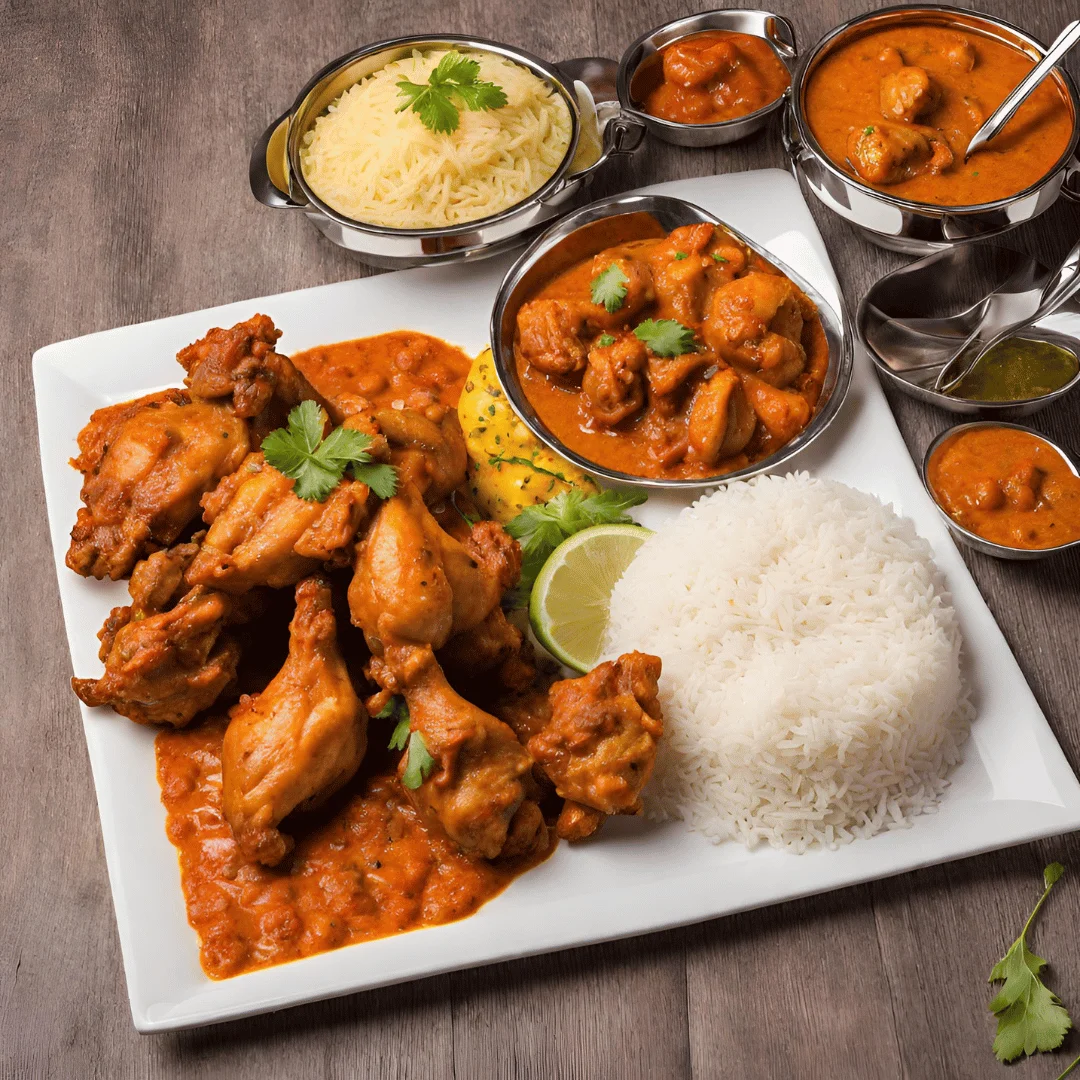

In [9]:
import PIL.Image
image=PIL.Image.open("/content/Chicken-Specialties-meal-for-two-mix-non-veg-platter.webp")
image

In [10]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

In [11]:
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash", google_api_key=GOOGLE_API_KEY)  # Replace with a supported model

In [13]:
def rate_meal(image_path,age,weight):

    message = HumanMessage(
        content=[
            {
                "type": "text",
                "text": f"tell the approximate calories of this meal...if the person is of age {age} and weight {weight} please tell if this meal is sufficeint for them for not...give a brief description of the meal adn at least 5 tips to improve their meal that helps them control weight and stay healthy,also give some alternates to this meal that are affordable and healthy" # Use f-string for formatting
            },
            {
                "type": "image_url",
                "image_url": image_path
            }
        ]
    )


    response = llm.invoke([message])

    print(response.content)

rate_meal("/content/Chicken-Specialties-meal-for-two-mix-non-veg-platter.webp", 30, 150)


This meal appears to be a Chicken Tikka Masala with rice. It is difficult to estimate the exact calorie count without knowing the specific ingredients and quantities used. However, a typical Chicken Tikka Masala with rice can range from 600 to 800 calories.

For a 30-year-old, 150-pound individual, this meal may be sufficient for one meal, but it might not provide enough nutrients for the entire day. It's important to note that individual calorie needs vary based on activity levels, metabolism, and other factors.

Here are 5 tips to improve the meal for weight management and overall health:

1. **Choose lean protein:** Opt for chicken breast or fish instead of chicken thighs to reduce the fat content.
2. **Increase vegetable intake:** Add a side salad or steamed vegetables to increase fiber and vitamins.
3. **Reduce the amount of sauce:** The sauce in Chicken Tikka Masala can be high in calories and fat. Reduce the portion size or choose a lighter sauce option.
4. **Use brown rice:** B